In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
KERNEL_SIZE = 5 # kernel size for the filters
HEIGHT, WIDTH = 276, 368 # new size of the image

## Preprocessing

### Practice: preprocessing in several steps, not all of them being used

In [34]:
#FIXME
path = './data/train/aim/G0010020.JPG'
#path = './data/practice/image.jpg'

In [35]:
# load the image in grayscale mode
img = cv.imread(path, 0).astype(np.uint8)

In [36]:
img.shape

(2880, 3840)

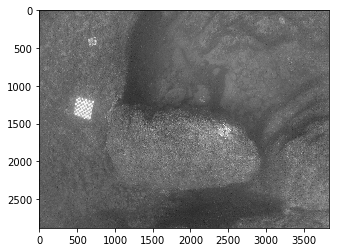

In [37]:
''' Display the image with OpenCV
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

# Display it with matplotlib
plt.imshow(img, cmap='gray')
plt.show()

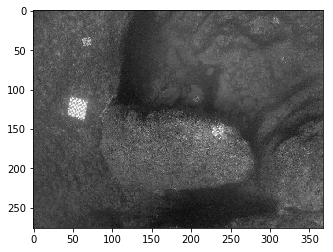

In [38]:
# Scaling 
height, width = img.shape[:2]
img2 = cv.resize(img, (WIDTH, HEIGHT), interpolation=cv.INTER_CUBIC)
plt.imshow(img2, cmap='gray')
plt.show()

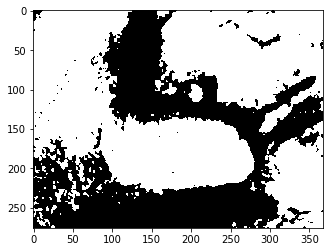

In [39]:
# Otsu’s binarization (not used)
# https://docs.opencv.org/4.0.0/d7/d4d/tutorial_py_thresholding.html
blur = cv.GaussianBlur(img2,(KERNEL_SIZE, KERNEL_SIZE), 0)
_, img3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(img3, cmap='gray')
plt.show()

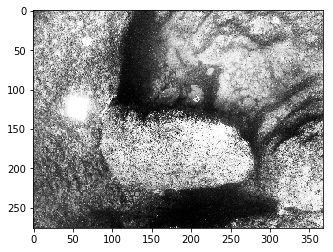

In [40]:
# Equalization (not used)
img3 = cv.equalizeHist(img2)
plt.imshow(img3, cmap='gray')
plt.show()

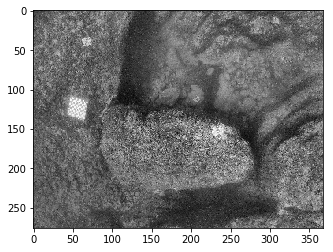

In [41]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
img2 = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img2)
plt.imshow(img2, cmap='gray')
plt.show()

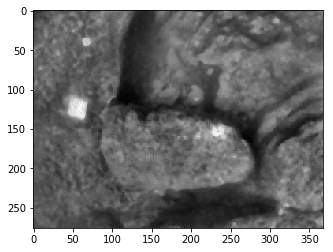

In [42]:
# Median filter
img2 = cv.medianBlur(img2, KERNEL_SIZE)
plt.imshow(img2, cmap='gray')
plt.show()

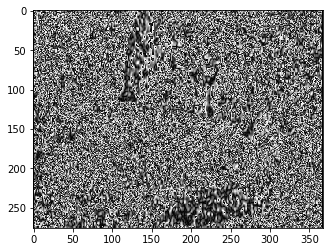

In [43]:
# Sobel filtering: apply cv.Sobel to have output dtype = cv.CV_64F (=float64). 
# Then take its absolute and convert to cv2.CV_8U (=uint8).
sobel64f = cv.Sobel(img2,cv.CV_64F,1,0,ksize=KERNEL_SIZE)
abs_sobel64f = np.absolute(sobel64f)
img2 = np.uint8(abs_sobel64f)
plt.imshow(img2, cmap='gray')
plt.show()

### Actual preprocessing

In [44]:
def image_preprocessing(path):
  # Open image
  try:
    img = cv.imread(path, 0).astype(np.uint8)
  except:
    return None
  
  # Scaling 
  img2 = cv.resize(img, (WIDTH, HEIGHT), interpolation=cv.INTER_CUBIC)
  
  # CLAHE (Contrast Limited Adaptive Histogram Equalization)
  img2 = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img2)

  # Median filter
  img2 = cv.medianBlur(img2, KERNEL_SIZE)

  # Sobel filtering: apply cv.Sobel to have output dtype = cv.CV_64F (=float64). 
  # Then take its absolute and convert to cv2.CV_8U (=uint8).
  #sobel64f = cv.Sobel(img2,cv.CV_64F,1,0,ksize=KERNEL_SIZE)
  #abs_sobel64f = np.absolute(sobel64f)
  #img2 = np.uint8(abs_sobel64f)
  
  return img2

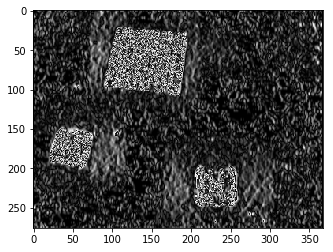

In [13]:
#FIXME
path = './data/practice/image.jpg'
plt.imshow(image_preprocessing(path), cmap='gray')
plt.show()

## Training

In [19]:
img = image_preprocessing(path)
img.resize(img.shape[0] * img.shape[1], 1)
img.shape
#img

(101568, 1)

In [17]:
type(img.shape)

tuple

In [21]:
os.walk('.')

<generator object walk at 0x7f796e04a620>

In [25]:
#FIXME
path = './data/train/aim'
for dirname, dirnames, filenames in os.walk(path):
  # print path to all subdirectories first
  for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

  # print path to all filenames.
  for filename in filenames:
    print(os.path.join(dirname, filename))

./data/train/aim/G0010020.JPG
./data/train/aim/G0010044.JPG
./data/train/aim/G0010055.JPG
./data/train/aim/G0010066.JPG
./data/train/aim/G0010088.JPG
./data/train/aim/G0010098.JPG
./data/train/aim/G0010159.JPG
./data/train/aim/G0010181.JPG
./data/train/aim/G0010352.JPG
./data/train/aim/G0010450.JPG
./data/train/aim/G0010469.JPG
./data/train/aim/G0010516.JPG
./data/train/aim/G0010559.JPG
./data/train/aim/G0010711.JPG
./data/train/aim/G0010740.JPG
./data/train/aim/G0010799.JPG
./data/train/aim/G0012796.JPG
./data/train/aim/G0012842.JPG
./data/train/aim/G0012909.JPG
./data/train/aim/G0012919.JPG
./data/train/aim/G0012963.JPG
./data/train/aim/G0013010.JPG
./data/train/aim/G0013107.JPG
./data/train/aim/G0020279.JPG
./data/train/aim/G0020309.JPG
./data/train/aim/G0040433.JPG
./data/train/aim/G0050669.JPG


54

./data/train/aim/G0010020.JPG


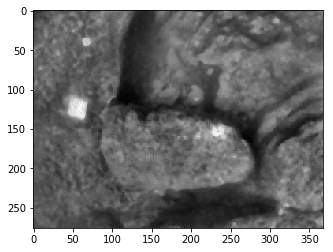

./data/train/aim/G0010044.JPG


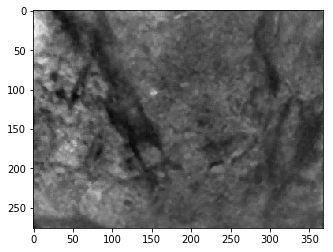

./data/train/aim/G0010055.JPG


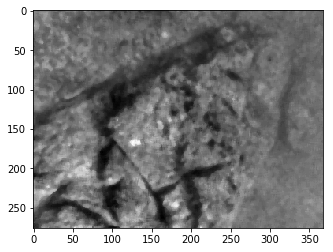

./data/train/aim/G0010066.JPG


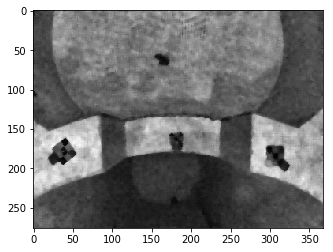

./data/train/aim/G0010088.JPG


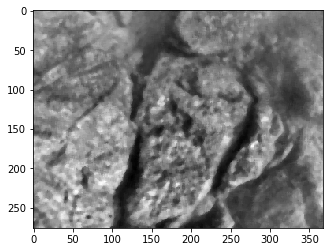

./data/train/aim/G0010098.JPG


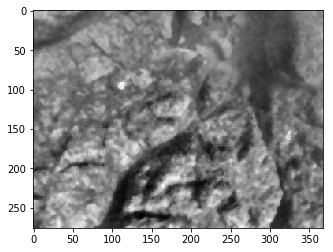

./data/train/aim/G0010159.JPG


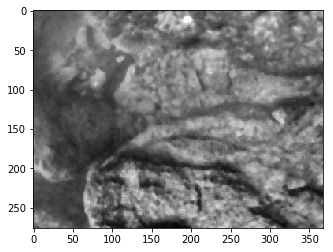

./data/train/aim/G0010181.JPG


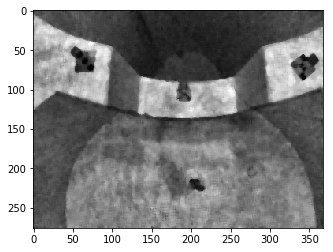

./data/train/aim/G0010352.JPG


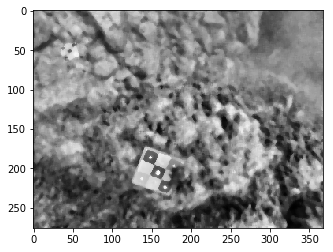

./data/train/aim/G0010450.JPG


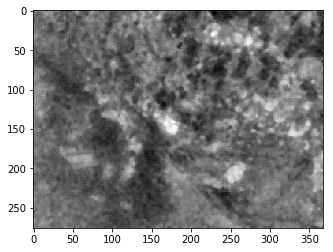

./data/train/aim/G0010469.JPG


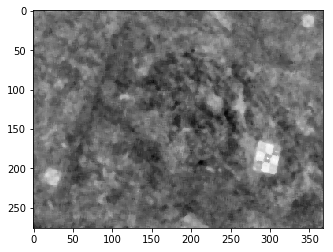

./data/train/aim/G0010516.JPG


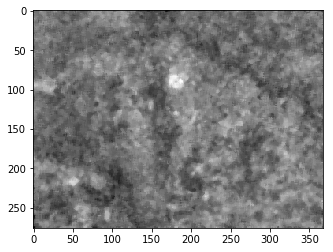

./data/train/aim/G0010559.JPG


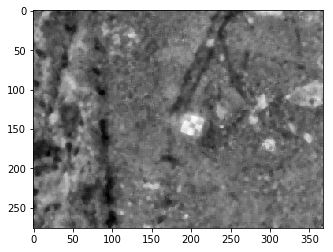

./data/train/aim/G0010711.JPG


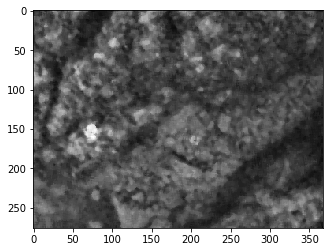

./data/train/aim/G0010740.JPG


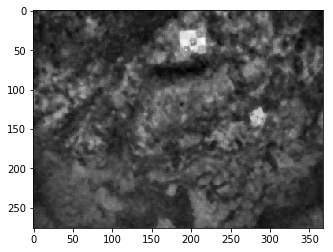

./data/train/aim/G0010799.JPG


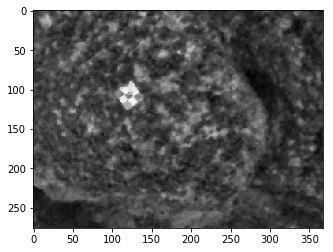

./data/train/aim/G0012796.JPG


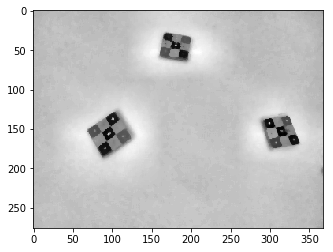

./data/train/aim/G0012842.JPG


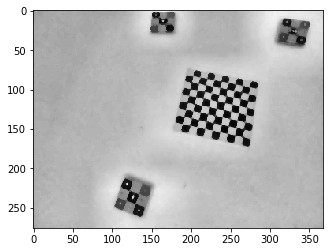

./data/train/aim/G0012909.JPG


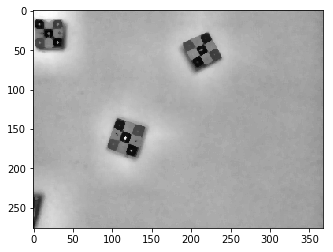

./data/train/aim/G0012919.JPG


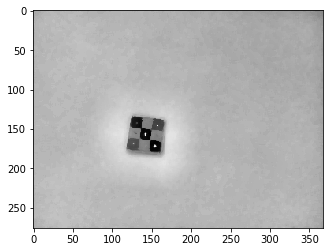

./data/train/aim/G0012963.JPG


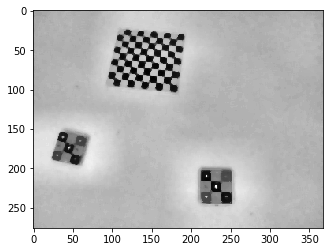

./data/train/aim/G0013010.JPG


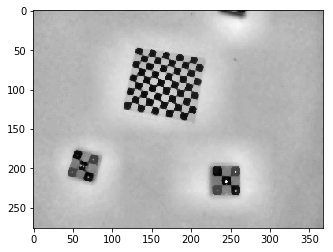

./data/train/aim/G0013107.JPG


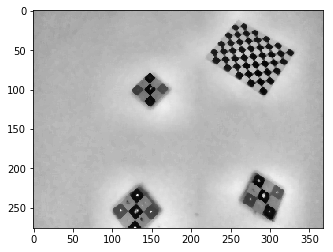

./data/train/aim/G0020279.JPG


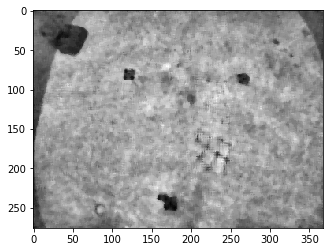

./data/train/aim/G0020309.JPG


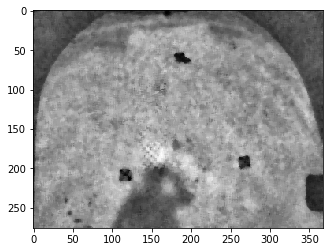

./data/train/aim/G0040433.JPG


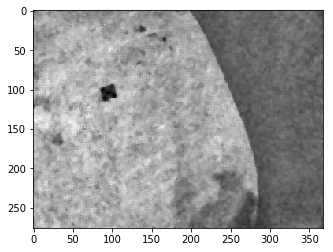

./data/train/aim/G0050669.JPG


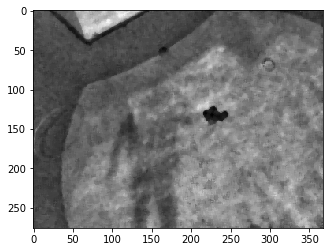

In [45]:
path = './data/train/aim'
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    full_path = os.path.join(dirname, filename)
    print(full_path)
    #img = cv.imread(full_path, 0).astype(np.uint8)
    img = image_preprocessing(full_path)
    plt.imshow(img, cmap='gray')
    plt.show()

In [56]:
a = np.arange(6)
b = np.append([a], [a], axis=0)
c = np.append(b, [a], axis=0)
print(c, c.shape)

[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]] (3, 6)


In [79]:
examples = None
labels = None
paths = ['./data/train/bottom', './data/train/aim']
for label in range(2):
  for dirname, _, filenames in os.walk(paths[label]):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      new_example = image_preprocessing(full_path).reshape(1, HEIGHT * WIDTH)
      new_label = label * np.ones((1,1), dtype=np.float32)
      if labels is None:
        examples = new_example
        labels = new_label
      else:
        examples = np.append(examples, new_example, axis=0)
        labels = np.append(labels, new_label, axis=0)    
examples.shape

(53, 101568)

In [80]:
labels.shape

(53, 1)

In [78]:
responses = np.float32(np.repeat(np.arange(3),4)[:,np.newaxis])
print(responses, responses.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]] (12, 1)
